# DBSCAN

Density-based spatial clustering of application with noise.

Used for clustering and outlier detection.

Focuses on using density of points as its main factor for assigning cluster labels. Helps with finding cluster segmentation that other algorithms struggle with.

Epsilon: distance extended from a point.

Minimum number of points: minimum number of points in an epsilon distance.

DBSCAN point types:

    Core: point with min number of points (including itself) in
    epsilon range. 
    Border: in epsilon range of core point but doesn't contain
    min number of points.
    Outlier: can't be reached by points in a cluster assignment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
blobs = pd.read_csv('/Users/modeedna/Desktop/LEARN/UDEMY/Python Data Science/UNZIP_FOR_NOTEBOOKS_FINAL/DATA/cluster_blobs.csv')

In [5]:
blobs.head()

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479


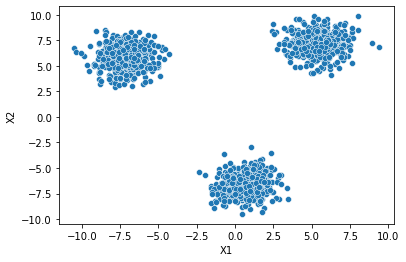

In [7]:
sns.scatterplot(data=blob, x='X1', y='X2');

In [8]:
moons = pd.read_csv('/Users/modeedna/Desktop/LEARN/UDEMY/Python Data Science/UNZIP_FOR_NOTEBOOKS_FINAL/DATA/cluster_moons.csv')

In [9]:
moons.head()

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


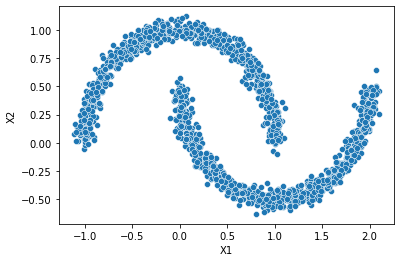

In [11]:
sns.scatterplot(data=moons, x='X1', y='X2');

In [12]:
circles = pd.read_csv('/Users/modeedna/Desktop/LEARN/UDEMY/Python Data Science/UNZIP_FOR_NOTEBOOKS_FINAL/DATA/cluster_circles.csv')

In [13]:
circles.head()

,X1,X2
0,-0.348677,0.010157
1,-0.176587,-0.954283
2,0.301703,-0.113045
3,-0.782889,-0.719468
4,-0.733280,-0.757354


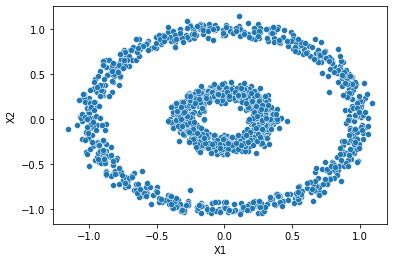

In [15]:
sns.scatterplot(data=circles, x='X1', y='X2');

In [16]:
# create a function that'll show how different a model categorizes the data
def display_categories(model, data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data, x='X1', y='X2', hue=labels, palette='Set1')

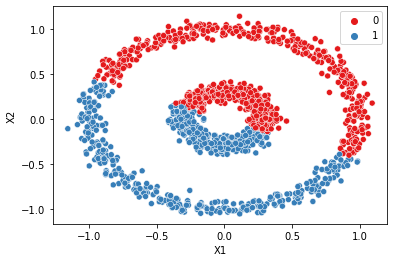

In [23]:
# KMeans blobs, moons, circles
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
display_categories(model, circles)

In [25]:
# DBSCAN
from sklearn.cluster import DBSCAN

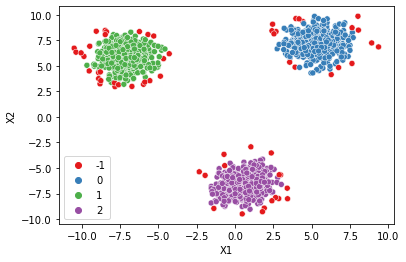

In [26]:
# -1 would be the outliers (with default hyperparameters)
# DBSCAN with blobs
model = DBSCAN()
display_categories(model, blobs)

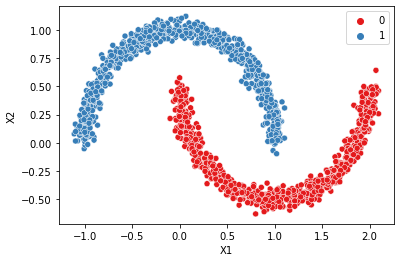

In [27]:
# DBSCAN with altered hyperparameters
model = DBSCAN(eps=0.15)
display_categories(model, moons)

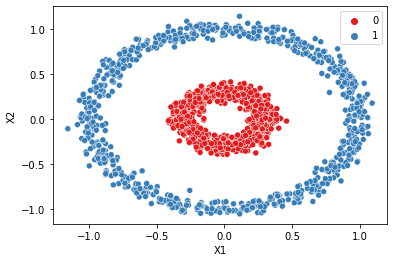

In [30]:
# DBSCAN with altered hyperparameters
model = DBSCAN(eps=0.15)
display_categories(model, circles)

### Selecting best hyperparameters

You can do elbow methods to find the best amounts.

X: epsilon value.

Y: Number of points claassified as outliers.

In [31]:
two_blobs = pd.read_csv('/Users/modeedna/Desktop/LEARN/UDEMY/Python Data Science/UNZIP_FOR_NOTEBOOKS_FINAL/DATA/cluster_two_blobs.csv')

In [32]:
two_blobs_outliers = pd.read_csv('/Users/modeedna/Desktop/LEARN/UDEMY/Python Data Science/UNZIP_FOR_NOTEBOOKS_FINAL/DATA/cluster_two_blobs_outliers.csv')

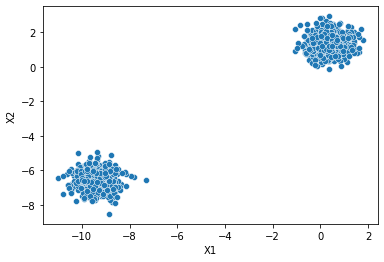

In [34]:
sns.scatterplot(data=two_blobs, x='X1', y='X2');

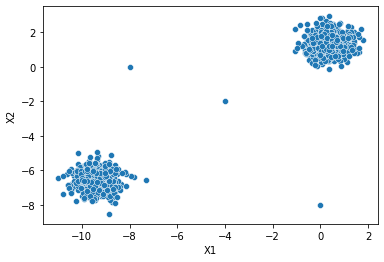

In [35]:
sns.scatterplot(data=two_blobs_outliers, x='X1', y='X2');

In [36]:
def display_categories(model, data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data, x='X1', y='X2', hue=labels, palette='Set1')

In [37]:
from sklearn.cluster import DBSCAN

In [38]:
dbscan = DBSCAN()

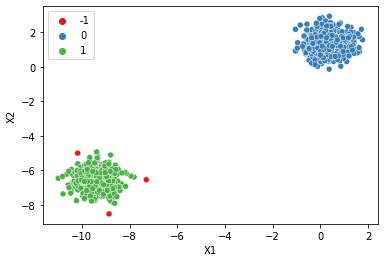

In [39]:
display_categories(dbscan, two_blobs)

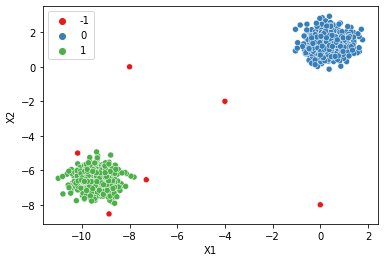

In [40]:
display_categories(dbscan, two_blobs_outliers)

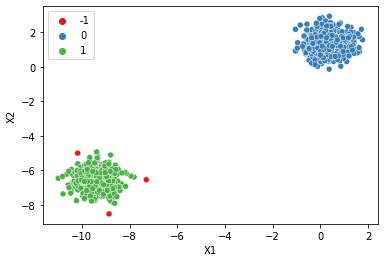

In [54]:
dbscan = DBSCAN(0.5)
display_categories(dbscan, two_blobs)

In [55]:
# measure the number of outliers
np.sum(dbscan.labels_ == -1)

3

In [56]:
# percentage of points classified as outliers
100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

0.3

In [62]:
outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.001, 7, 200):
    
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)
    
    # total outliers found
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    # percent of points classified as outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

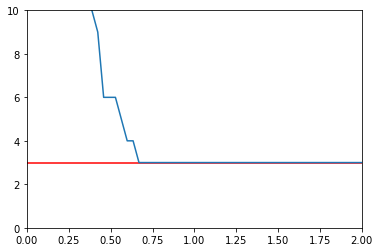

In [65]:
sns.lineplot(x=np.linspace(0.001, 7, 200), y=number_of_outliers)
plt.xlim(0,2)
plt.ylim(0,10)
plt.hlines(y=3, xmin=0, xmax=2, color='red');